# Tutorial 5

### 1. Evaluate the following integral using Monte Carlo, Simpson's rule, trapezoid rule and analytical values:

a. $\begin{aligned}I=\int^1_0e^{-x}\cos{\left(x\right)}dx\end{aligned}$

b. $\begin{aligned}I=\int^{2\pi}_0e^{\sin{\left(2x\right)}}dx\end{aligned}$

c. $\begin{aligned}I=\int^{2\pi}_0\frac{1}{2+\cos{x}}dx\end{aligned}$


1. The formula of Simpson's Rule that we'll be using here is composite Simpson's 1/3 rule:
    $$\begin{aligned}
    \int_a^b f(x)\, dx
    &\approx \frac{1}{3} h\sum_{i = 1}^{n/2}\big[f(x_{2i - 2}) + 4f(x_{2i - 1}) + f(x_{2i})\big]\\
    &= \frac{1}{3} h\left[f(x_0) + 4\sum_{i = 1}^{n/2} f(x_{2i - 1}) + 2\sum_{i = 1}^{n/2 - 1} f(x_{2i}) + f(x_n)\right]
    \end{aligned}$$

    where the interval $\left[a, b\right]$ is divided into subintervals of length $h = \frac{b - a}{n}$, $x=a+ih$ for $0\le i\le n$.

    The error for composite Simpson's 1/3 rule is:
    $$
    \begin{aligned}
    \left|E\right|\le\frac{\left(b-a\right)h^4}{180}\left[\text{max}\left|f^{\left(4\right)}\left(x\right)\right|\right]
    \end{aligned}
    $$

2. The formula of Trapezoid rule that we'll be using is:
    $$\begin{aligned}
    \int_{a}^{b} f(x)\, dx
    &\approx \frac{h}{2} \sum_{k=1}^{N} \left( f(x_{k-1}) + f(x_{k}) \right) \\
    &= h \left( \frac{f(x_N) + f(x_0) }{2} +  \sum_{k=1}^{N-1} f(x_k) \right)
    \end{aligned}$$

    The error for trapezoid rule is:
    $$
    \begin{aligned}
    \left|E\right|\le\frac{\left(b-a\right)^3}{12n^2}\left[\text{max}\left|f''\left(x\right)\right|\right]
    \end{aligned}
    $$

  
In the interval $\left[a, b\right]$, we take the maximum value of $f''\left(x\right)$ and $f^{\left(4\right)}\left(x\right)$, and thus obtain the most conservative estimation of error.

3. The formula of Monte Carlo Integration that we'll be using is:
    $$
    \begin{aligned}
      \int_a^b f(x)\, dx
      &\approx \frac{b-a}{n}\sum^{n-1}_{i=0}f\left(x_i\right)
    \end{aligned}
    $$

    The error for Monte Carlo is the standard error of the sampling mean, of the values of the function:
    $$
    \begin{aligned}
    \left|E\right|=\frac{\text{std}\left[f\left(X_i\right)\right]}{\sqrt{n}}
    \end{aligned}
    $$

First we import the libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson, trapezoid
import random
from scipy.special import exp1
from scipy.stats import norm

plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams.update({'font.size': 16, 'axes.grid': True})

To compare the different methods, I have combined the methods and their error estimation into one chunk of code.

The code is consists of:
1. Analytical integration (if possible)
2. Simpson's 1/3 rule
3. Simpson's method using library from scipy.integrate
4. Error estimation of Simpson's method (from the formula above)
5. Direct Trapezoid rule
6. Trapezoid rule using library from scipy.integrate
7. Error estimation of Trapezoid rule (from the formula above)
8. Monte Carlo method, with uniform weightage
9. Error estimation of Monte Carlo method (from the formula above)
10. Plotting of the function

In [2]:
def algorithm(f, f_int, f_pp, f_pppp, a, b, n):
    x = np.linspace(a, b, n + 1)
    h = (b - a) / n
    
    # Step 1
    def int_value(f_int, a, b):
        return f_int(b) - f_int(a)
    print('1. Analytical integration:', int_value(f_int, a, b))
#-------------------------------------------------------------------------------------------------
    # Step 2
    def simpson_method(f, a, b, n):
        if n % 2 != 0:  # Simpson's rule requires n to be even
            n += 1
        y = f(x)
        S = h / 3 * (y[0] + y[-1] + 4 * np.sum(y[1:n:2]) + 2 * np.sum(y[2:n-1:2]))
        return S
    print('2. Simpson method, direct:', simpson_method(f, a, b, n))
    
    # Step 3
    print('3. Simpsons method, library:', simpson(y = f(x), x = x))
#-------------------------------------------------------------------------------------------------
    # Step 4
    def error_simpson(f_pppp, a, b, n):
        return -h ** 4 / 180 * (b - a) * np.max(np.abs(f_pppp(x)))
    print(f'4. Error estimate for simpson rule:, {abs(error_simpson(f_pppp, a, b, n)):.1g}')
#-------------------------------------------------------------------------------------------------
    # Step 5
    def trapezoid_rule(f, a, b, n):
        y = f(x)
        T = h * (0.5 * y[0] + 0.5 * y[-1] + np.sum(y[1:-1]))
        return T
    print('5. Trapezoid rule, direct:', trapezoid_rule(f, a, b, n))
    
    # Step 6
    print('6. Trapezoid rule, library:', trapezoid(y = f(x), x = x))
#-------------------------------------------------------------------------------------------------
    # Step 7
    def error_trapezoid(f_pp, a, b, n):
        return -((b - a) ** 3) / (12 * n ** 2) * np.max(np.abs(f_pp(x)))
    print(f'7. Error estimate for trapezoid rule: {abs(error_trapezoid(f_pp, a, b, n)):.1g}')
#-------------------------------------------------------------------------------------------------
    # Step 8
    def montecarlo_method(f, a, b, n):
        x = np.random.uniform(a, b, n)
        f_values = f(x)
        integral = (b - a) * np.mean(f_values)
        error = (np.std(f_values)) / np.sqrt(n)  # Sample standard deviation
        return integral, error

    # Step 8: Monte Carlo Integration
    result, error = montecarlo_method(f, a, b, n)
    print(f'8. Monte Carlo method: {result}')

    # Step 9: Monte Carlo Error Estimate
    print(f'9. Error estimate for Monte Carlo method: {error:.3g}')
#-------------------------------------------------------------------------------------------------
    # Step 10
    random_colour = (random.random(), random.random(), random.random())  
    plt.plot(x, f(x), color=random_colour, label='f(x)')
    plt.title(f'$f\\left(x\\right)$')
    plt.xlabel('$x$')
    plt.ylabel('$f\\left(x\\right)$')
    plt.fill_between(x, f(x), alpha=0.25, color=random_colour, label='Exact integral = {:.8g}'.format(int_value(f_int, a, b)))
    plt.tight_layout()
    plt.legend()
    plt.show()

For (a):

The list of equations are as follows:

$$
\begin{aligned}
\int f\left(x\right)\mathrm{d}x&=\frac{\mathrm{e}^{-x} \left(\sin\left(x\right) - \cos\left(x\right)\right)}{2}+C
\\
f\left(x\right)&=\mathrm{e}^{-x} \cos\left(x\right)
\\
f''\left(x\right)&=2\mathrm{e}^{-x} \sin\left(x\right)
\\
f^{\left(4\right)}\left(x\right)&=-4\mathrm{e}^{-x} \cos\left(x\right)
\end{aligned}
$$

1. Analytical integration: 0.5553968826533496
2. Simpson method, direct: 0.5553968826533496
3. Simpsons method, library: 0.5553968826533495
4. Error estimate for simpson rule:, 2e-26
5. Trapezoid rule, direct: 0.5553968826533906
6. Trapezoid rule, library: 0.5553968826533907
7. Error estimate for trapezoid rule: 5e-14
8. Monte Carlo method: 0.5554389888808987
9. Error estimate for Monte Carlo method: 0.000235


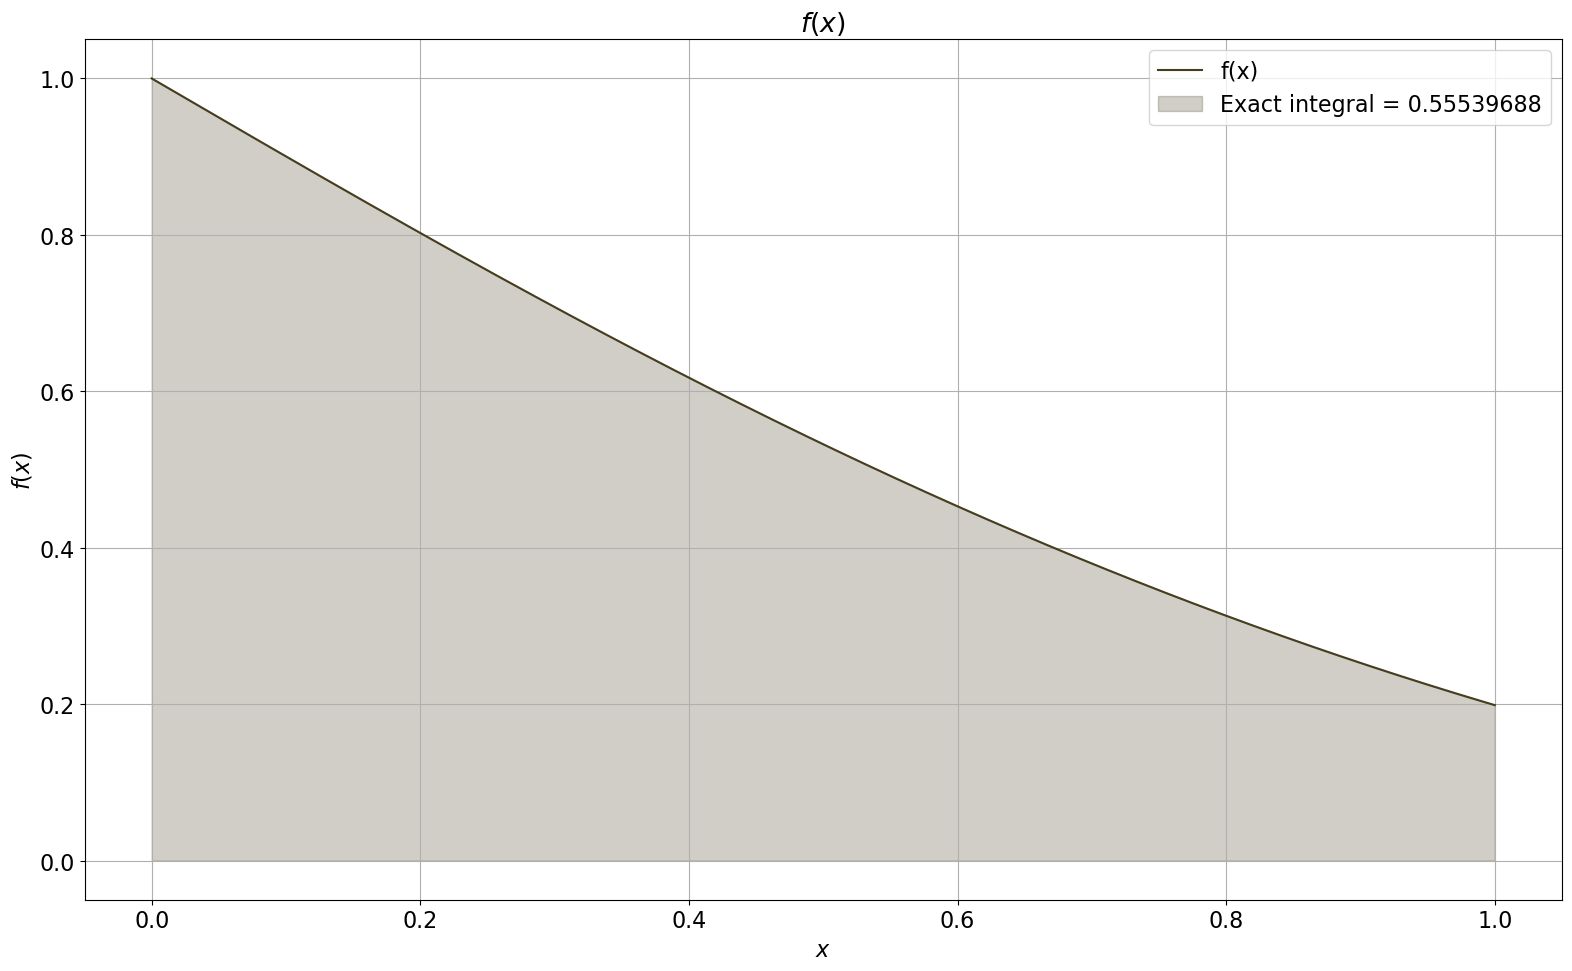

In [3]:
def f_1(x):
        return np.exp(-x) * np.cos(x)
    
def f_1_int(x):
        return np.exp(-x) * (np.sin(x) - np.cos(x)) / 2

def f_1_pp(x):
        return 2 * np.exp(-x) * np.sin(x)

def f_1_pppp(x):
        return -4 * np.exp(-x) * np.cos(x)

algorithm(f_1, f_1_int, f_1_pp, f_1_pppp, 0, 1, n = 1000000)

For (b):

The list of equations are as follows:

$$
\begin{aligned}
\int f\left(x\right)\mathrm{d}x&=\text{no analytical solution}
\\
f\left(x\right)&=\mathrm{e}^{\sin\left(2x\right)}
\\
f''\left(x\right)&=-4\mathrm{e}^{\sin\left(2x\right)} \left(\sin\left(2x\right) - \cos^{2}\left(2x\right)\right)
\\
f^{\left(4\right)}\left(x\right)&=-8\mathrm{e}^{\sin\left(2x\right)} \cos\left(2x\right) \left(3 \sin\left(2x\right) - \cos^{2}\left(2x\right) + 1\right)
\end{aligned}
$$

1. Analytical integration: 0
2. Simpson method, direct: 7.954926521012846
3. Simpsons method, library: 7.954926521012843
4. Error estimate for simpson rule:, 9e-21
5. Trapezoid rule, direct: 7.954926521012846
6. Trapezoid rule, library: 7.9549265210128475
7. Error estimate for trapezoid rule: 2e-10
8. Monte Carlo method: 7.95130322036258
9. Error estimate for Monte Carlo method: 0.000823


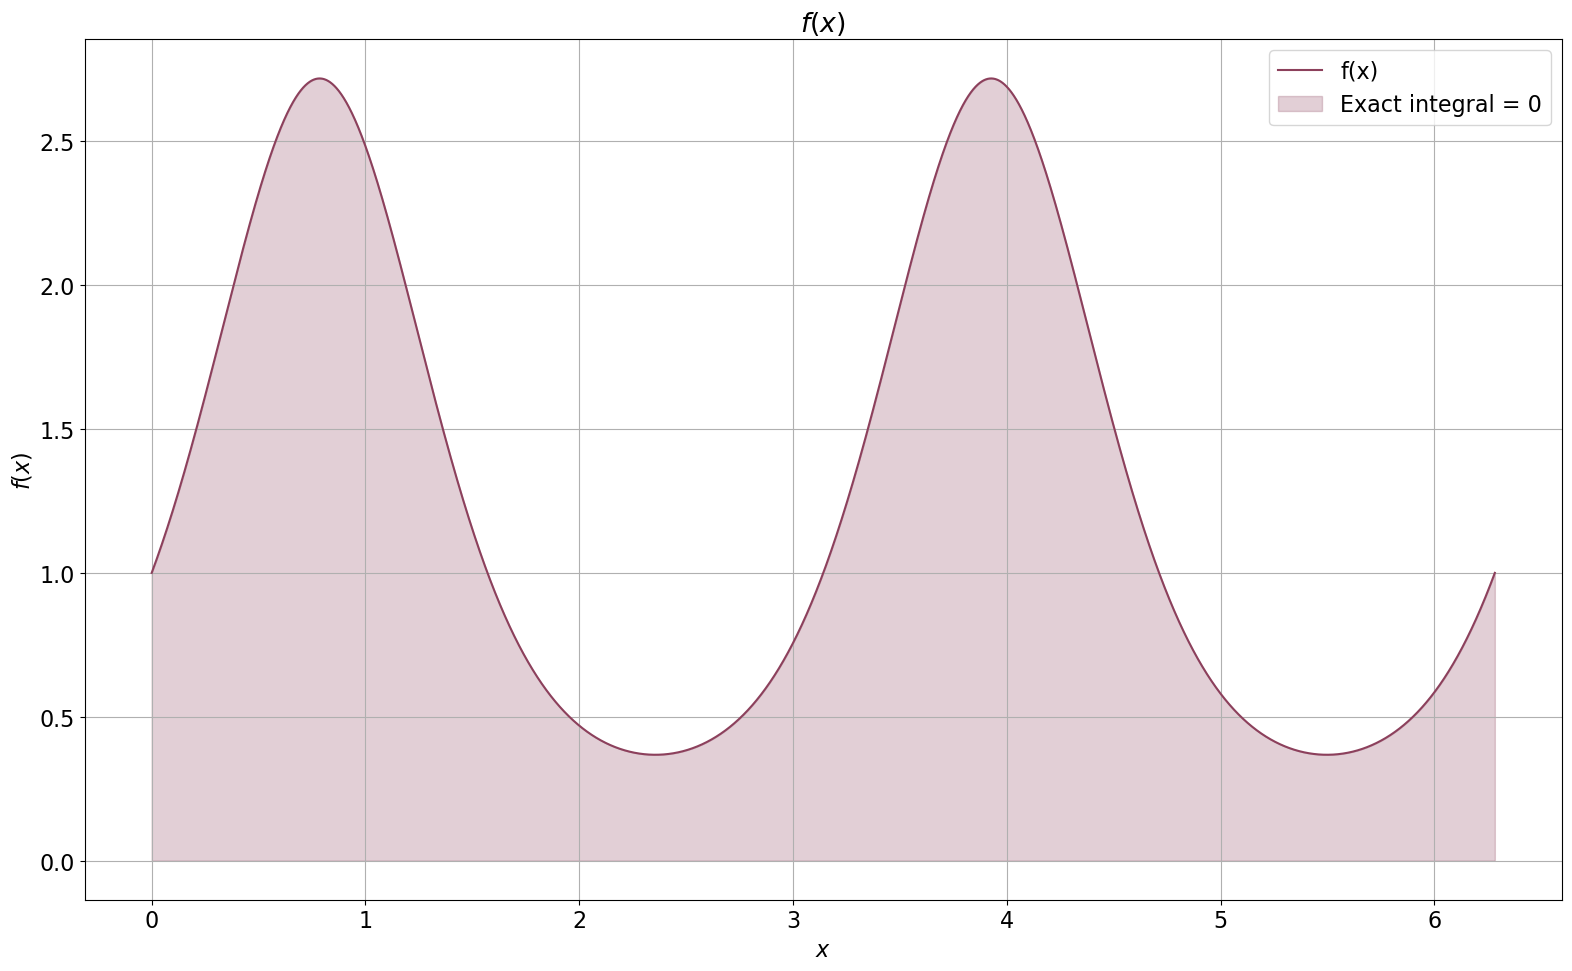

In [4]:
def f_2(x):
        return np.exp(np.sin(2 * x))
    
def f_2_int(x):
        return 0 # No analytical solution

def f_2_pp(x):
        return -4 * np.exp(np.sin(2 * x)) * (np.sin(2 * x) - (np.cos(2 * x)) ** 2)

def f_2_pppp(x):
        return 16 * np.exp(np.sin(2 * x)) * (3 * (np.sin(2 * x)) ** 2 + (1 - 6 * (np.cos(2 * x)) ** 2) * np.sin(2 * x) + (np.cos(2 * x)) ** 4 -4 * (np.cos(2 * x)) ** 2)

algorithm(f_2, f_2_int, f_2_pp, f_2_pppp, 0, 2 * np.pi, n = 1000000)

For (c):

The list of equations are as follows:

$$
\begin{aligned}
\int f\left(x\right)\mathrm{d}x&=\frac{2 \arctan\left(\frac{\sin\left(x\right)}{\sqrt{3} \left(\cos\left(x\right) + 1\right)}\right)}{\sqrt{3}}+C
\\
f\left(x\right)&=\frac{1}{\cos\left(x\right) + 2}
\\
f''\left(x\right)&=\frac{\sin^{2}\left(x\right) + 2 \cos\left(x\right) + 1}{\left(\cos\left(x\right) + 2\right)^{3}}
\\
f^{\left(4\right)}\left(x\right)&=\frac{\cos^{4}\left(x\right) - 22 \cos^{3}\left(x\right) + 24 \cos^{2}\left(x\right) + 32 \cos\left(x\right) - 8}{\left(\cos\left(x\right) + 2\right)^{5}}
\end{aligned}
$$

The program outputs the analytical solution as almost zero, as it is choosing the wrong quadrants of the angle. Nevertheless, one can manually input the values and obtain:
$$\begin{aligned}
\int^{2\pi}_0 \frac{1}{\cos\left(x\right) + 2}\mathrm{d}x=\frac{2}{\sqrt{3}}\pi
\end{aligned}
$$

1. Analytical integration: -8.16431199431569e-17
2. Simpson method, direct: 3.6275987284684366
3. Simpsons method, library: 3.6275987284684357
4. Error estimate for simpson rule:, 4e-22
5. Trapezoid rule, direct: 3.627598728468435
6. Trapezoid rule, library: 3.627598728468434
7. Error estimate for trapezoid rule: 2e-11
8. Monte Carlo method: 3.6270385134939773
9. Error estimate for Monte Carlo method: 0.000227


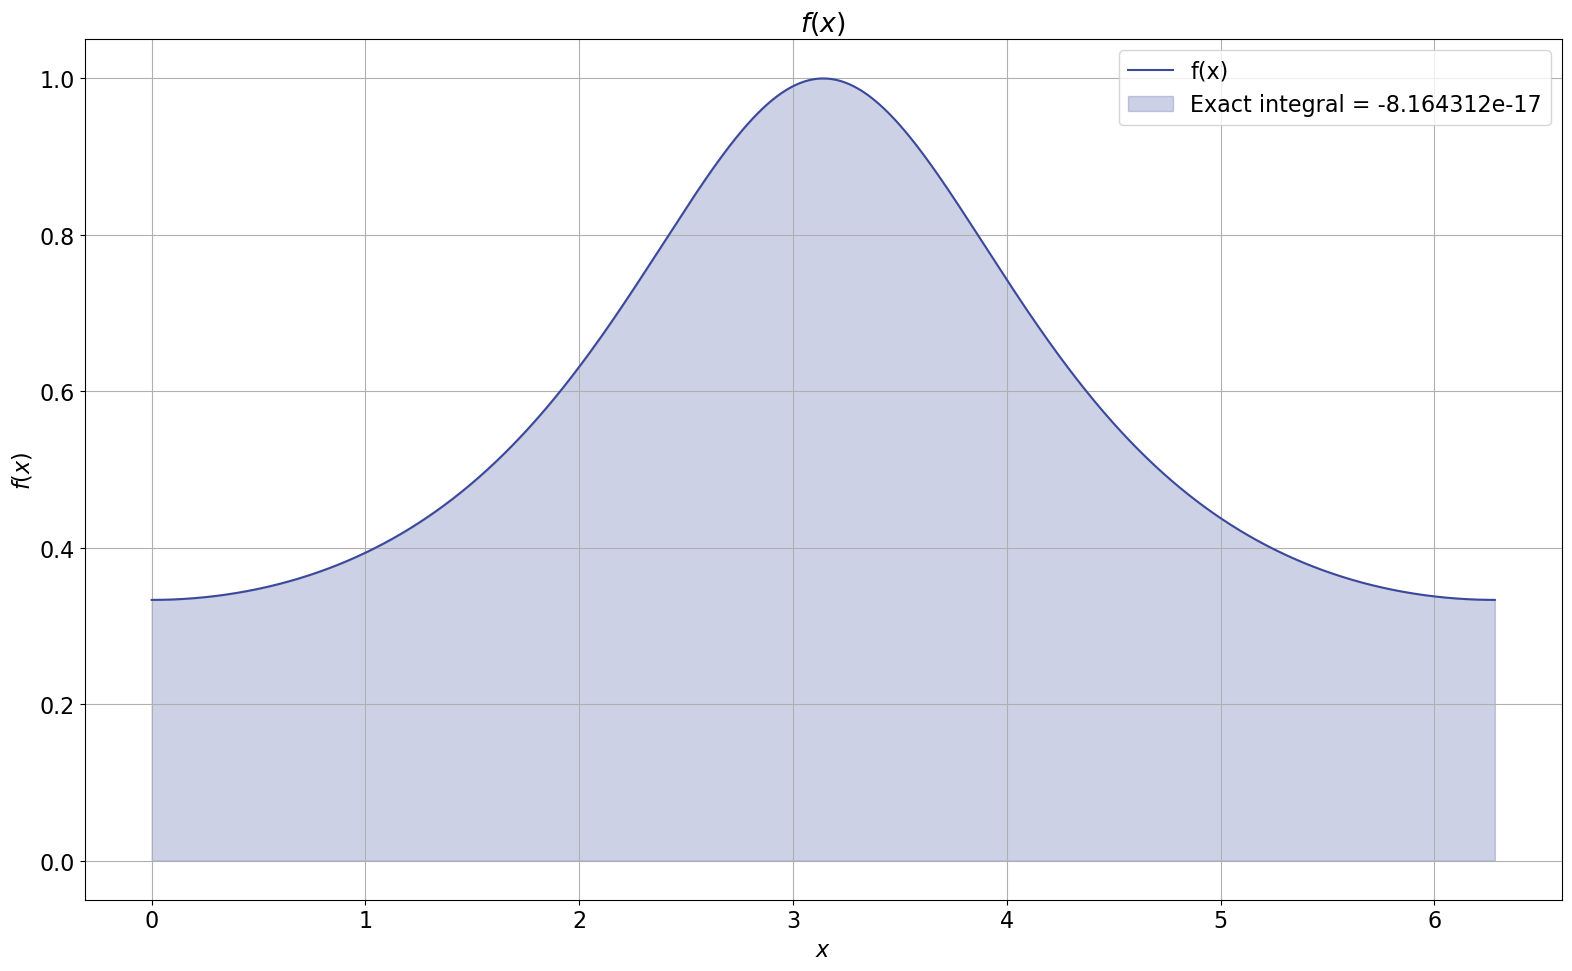

In [5]:
def f_3(x):
        return 1 / (2 + np.cos(x))

def f_3_int(x):
        return 2 / np.sqrt(3) * np.arctan((np.sin(x)) / (np.sqrt(3) * (np.cos(x) + 1)))

def f_3_pp(x):
        return ((np.sin(x)) ** 2 + 2 * np.cos(x) + 1) / (np.cos(x) + 2) ** 3

def f_3_pppp(x):
        return ((np.cos(x)) ** 4 - 22 * (np.cos(x)) ** 3 + 24 * (np.cos(x)) ** 2 + 32 * np.cos(x) - 8) / (np.cos(x) + 2) ** 5

algorithm(f_3, f_3_int, f_3_pp, f_3_pppp, 0, 2 * np.pi, n = 1000000)

### 2. Apply normal distribution to the following integral

$$\begin{aligned}
I=\int^1_{10^{-6}}\frac{e^{-x}}{x}dx
\end{aligned}
$$

Answer:

The list of equations are as follows:

$$
\begin{aligned}
f\left(x\right)&=\frac{\mathrm{e}^{-x}}{x}
\\
f''\left(x\right)&=\frac{\left(x^{2} + 2x + 2\right) \mathrm{e}^{-x}}{x^{3}}
\\
f^{\left(4\right)}\left(x\right)&=\frac{\left(x^{4} + 4x^{3} + 12x^{2} + 24x + 24\right) \mathrm{e}^{-x}}{x^{5}}
\end{aligned}
$$

The exact value of the integral is:

$$\begin{aligned}
I&=\int^1_{10^{-6}}\frac{e^{-x}}{x}dx
\\
&=\Gamma\left(0, 10^{-6}\right)-\Gamma\left(0, 1\right)
\\
&=-\left(E_1\left(1\right) - E_1\left(10^{-6}\right)\right)
\\
&\approx13.01891195866697
\end{aligned}
$$

1. Analytical integration: 13.018911958666969
2. Simpson method, direct: 42.536265454014924
3. Simpsons method, library: 42.53626545401493
4. Error estimate for simpson rule:, 1e+13
5. Trapezoid rule, direct: 58.9745782133061
6. Trapezoid rule, library: 58.974578213306124
7. Error estimate for trapezoid rule: 2e+09
8. Monte Carlo method: 8.422341014540413
9. Error estimate for Monte Carlo method: 1.08


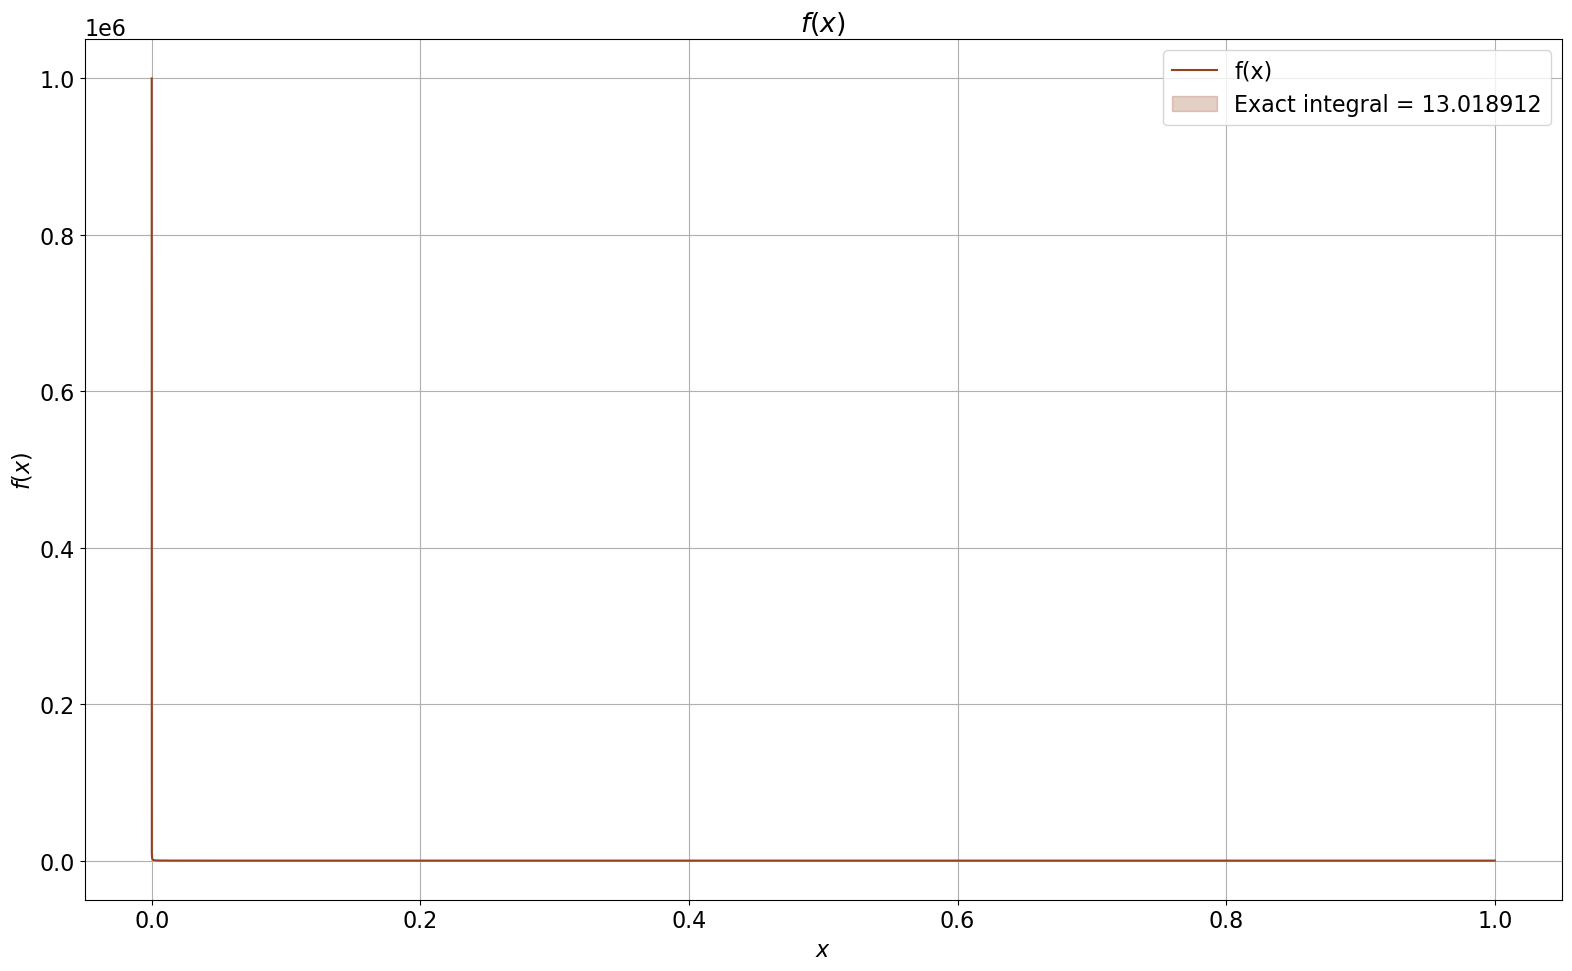

In [6]:
def g(x):
    return np.exp(-x) / x

def g_int(x):
    return -exp1(x)

def g_pp(x):
    return (x ** 2 + 2 * x + 2) * np.exp(-x) / x ** 3

def g_pppp(x):
    return (x ** 4 + 4 * x ** 3 + 12 * x ** 2 + 24 * x + 24) * np.exp(-x) / x ** 5

algorithm(g, g_int, g_pp, g_pppp, 1e-6, 1, n = 10000)

At small number of intervals (less than 100000), Simpson's method and Trapezoid rule outputs value that is wildly inaccurate. This is due to the steep changes in the gradient of the function contributing to the deviation (overestimation, in this case) of the integral. Large interval widths exacerbates the deviation, so large number of intervals are needed to reduce the interval width.

The errors for Simpson's method and Trapezoid rule are large, as the maximum value of the function within the interval is at $x=1\times 10^{-6}$, which corresponds to $f''\left(1\times 10^{-6}\right)\approx 2\times 10^{18}$ and $f^{\left(4\right)}\left(1\times 10^{-6}\right)\approx 2.4\times 10^{31}$. A large number of interval is needed to tame the error. 

However, using the Monte Carlo integration combined with normal distribution, the estimation of the integral is much controlled, this is where the Monte carlo distribution shows its advantage against the other two methods.

We use Importance sampling to estimate the integral, which reduces the variance of our sampling:

$$
\begin{aligned}
I\approx\frac 1 N\sum^N_{i=1}\frac{f\left(\vec r\right)}{w\left(\vec r\right)}
\end{aligned}
$$

where in this case, $w\left(\vec r\right)$ is the normal distribution,

$$
\begin{aligned}
f\left(x\right)=\frac{1}{\sigma\sqrt{2\pi}}\mathrm{e}^{-\frac 1 2\left(\frac{x-\mu}{\sigma}\right)^2}
\end{aligned}
$$


The code below shows the application of normal distribution combined with the Monte Carlo Integration, using $\sigma=1$ and $\mu=0$, since the function we want to integrate is symmetric at $x=0$:

In [7]:
sigma = 1
mu = 0

# Normal distribution
def Normal(x):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Function to integrate
def g(x):
    return np.exp(-x) / x

# Interval
a = 1e-6
b = 1

# Function to generate samples within an interval
def sample_normal_within_interval(mean, std_dev, low, high, size):
    samples = []
    while len(samples) < size:
        sample = np.random.normal(mean, std_dev)
        if low <= sample <= high:
            samples.append(sample)
    return np.array(samples)

# Generate 100 samples within the interval [-1, 1]
samples = sample_normal_within_interval(mu, sigma, a, b, 10000)

# Weighted function, while normalising the area to 1
def g_weighted(x):
    return g(x) / Normal(x) * (norm.cdf(b, mu, sigma) - norm.cdf(a, mu, sigma))

IS = np.mean(g_weighted(samples))
error = np.std(g_weighted(samples)) / np.sqrt(len(samples))
print('The value of the integral is =', IS)
print('Error', error)

The value of the integral is = 15.201843956340792
Error 4.9949668557388325


For 10000 points, the importance sampling is obtaining similar values for the integral. This shows that Monte Carlo is the better choice of integrating method, unlike Simpson's method and Trapezoid rule, both gives inaccurate results.

Importance sampling is a valuable technique in Monte Carlo integration because it focuses computational effort on regions that contribute significantly to the integral. By assigning greater weight to these regions, the accuracy of the estimation improves.

In our case, the normal distribution prioritizes the region near zero, which is where the function increases exponentially. In contrast, a uniform distribution assigns equal weight to all values, potentially overemphasizing regions with little contribution while undervaluing those that are crucial for the integral.